In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
n_sensors = 10
#n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [5]:
x_csv = x_csv.to_numpy(dtype='float32')

In [6]:
x_5degree = np.hstack((x_csv[:, 0], x_csv[:, 1], x_csv[:, 3], x_csv[:, 4], x_csv[:, 6],
                       x_csv[:, 7], x_csv[:, 9], x_csv[:, 10], x_csv[:, 12], x_csv[:, 13]))

In [7]:
x_5degree.shape

(4380,)

In [8]:
x = x_5degree.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [11]:
y = y_5degree.reshape((73*6, 100, 100))

In [12]:
tsr = x_csv[:, -2]

In [13]:
theta = x_csv[:, -1]

In [14]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [15]:
print(y_train.shape)

(394, 100, 100)


In [16]:
print(y_test.shape)

(44, 100, 100)


In [17]:
print(x_train.shape)

(394, 10, 1)


In [18]:
print(x_test.shape)

(44, 10, 1)


In [19]:
theta_train

array([ 40., 165.,  55., 325.,  20., 155.,  90.,  75.,  75., 265.,   0.,
        95., 305., 350., 280.,   5., 245., 100., 185., 330., 325.,  30.,
       125.,   0., 255., 200., 210.,  95., 250., 230., 100., 255.,  65.,
       110., 230.,  85., 130., 215., 300., 285., 320., 120.,  85., 330.,
       230., 205., 155.,  55.,  65., 135., 105.,  40., 320.,  30., 315.,
       265., 270.,  25., 225.,  10., 315.,  60., 280.,  80., 195., 220.,
       220.,  15.,  90., 110., 300., 110., 320., 315., 185., 290., 330.,
       145., 335., 325.,  50., 130.,  35., 150., 160., 175., 130., 215.,
       225., 205., 340., 315., 160., 210., 260., 305., 120., 145., 300.,
       170., 265., 180., 330., 360.,  90.,  80., 165.,  50., 210., 130.,
         5., 295., 110., 230., 245., 115., 235., 140., 310., 245.,  45.,
       220.,  15., 180., 330., 140., 190., 100., 170., 295., 190., 250.,
       310.,  30., 120.,  50.,  60.,  20., 155.,  50.,  60., 150.,  40.,
       150., 275., 105., 225., 200., 150.,  60., 32

In [20]:
tsr_train

array([1.7, 1.5, 1.7, 1.9, 1.6, 1.8, 2. , 1.5, 2. , 1.6, 1.5, 1.5, 1.8,
       1.8, 1.5, 1.8, 1.9, 1.6, 1.9, 1.8, 1.8, 2. , 1.5, 2. , 2. , 1.6,
       1.5, 1.7, 2. , 2. , 1.9, 1.6, 1.9, 1.5, 1.5, 1.6, 1.8, 1.6, 2. ,
       1.5, 1.6, 1.5, 1.5, 1.5, 1.8, 2. , 1.5, 1.6, 2. , 1.7, 1.6, 1.8,
       2. , 1.7, 1.9, 1.8, 2. , 1.5, 1.5, 1.7, 2. , 2. , 1.8, 1.5, 2. ,
       1.6, 2. , 1.5, 1.5, 1.7, 1.5, 1.9, 1.9, 1.5, 1.6, 1.8, 1.9, 1.5,
       1.6, 1.7, 1.8, 1.5, 1.5, 1.7, 2. , 1.6, 1.9, 2. , 1.6, 1.6, 1.6,
       1.7, 1.9, 1.9, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.6,
       1.8, 2. , 2. , 1.6, 2. , 1.7, 1.6, 1.9, 2. , 1.6, 2. , 2. , 1.7,
       1.8, 1.8, 1.7, 1.9, 1.9, 1.8, 1.5, 1.6, 1.9, 1.7, 1.8, 1.8, 1.5,
       1.6, 1.7, 1.7, 1.5, 1.9, 1.9, 1.7, 1.7, 1.7, 1.5, 1.8, 1.6, 1.6,
       1.8, 1.8, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.7, 1.7,
       1.7, 1.5, 1.6, 1.5, 2. , 1.6, 1.9, 1.6, 1.6, 1.9, 1.8, 1.6, 2. ,
       1.5, 1.5, 1.5, 1.6, 1.6, 2. , 1.7, 1.7, 1.5, 2. , 1.8, 2.

In [21]:
os.chdir('C:\\Users\\User')

In [22]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [23]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 10)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               5632      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [24]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [25]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 5ms/step - loss: 0.0110 - rmse: 0.1041
Epoch 2/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.1036
Epoch 3/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0108 - rmse: 0.1031
Epoch 4/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0106 - rmse: 0.1023
Epoch 5/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.1010
Epoch 6/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0098 - rmse: 0.0983
Epoch 7/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0088 - rmse: 0.0932
Epoch 8/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0881
Epoch 9/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0076 - rmse: 0.0861
Epoch 10/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0851
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0806
Epoch 85/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0803
Epoch 86/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0802
Epoch 87/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0802
Epoch 88/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0801
Epoch 89/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 90/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0801
Epoch 91/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 92/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 93/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0778
Epoch 168/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0778
Epoch 169/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0780
Epoch 170/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0777
Epoch 171/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0776
Epoch 172/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0776
Epoch 173/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0776
Epoch 174/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0776
Epoch 175/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0775
Epoch 176/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0776
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0757
Epoch 250/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0757
Epoch 251/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0757
Epoch 252/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0756
Epoch 253/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0756
Epoch 254/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0755
Epoch 255/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0755
Epoch 256/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0756
Epoch 257/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0755
Epoch 258/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0754
Epoch 259/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0734
Epoch 332/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0736
Epoch 333/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0733
Epoch 334/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0733
Epoch 335/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0734
Epoch 336/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0732
Epoch 337/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0730
Epoch 338/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0732
Epoch 339/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0730
Epoch 340/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0731
Epoch 341/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0709
Epoch 414/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0708
Epoch 415/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0708
Epoch 416/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0709
Epoch 417/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0713
Epoch 418/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0710
Epoch 419/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0709
Epoch 420/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0707
Epoch 421/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0706
Epoch 422/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0705
Epoch 423/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0689
Epoch 496/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0690
Epoch 497/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0690
Epoch 498/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0690
Epoch 499/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0689
Epoch 500/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0694
Epoch 501/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0704
Epoch 502/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0691
Epoch 503/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0697
Epoch 504/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0698
Epoch 505/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0669
Epoch 578/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0670
Epoch 579/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0668
Epoch 580/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0667
Epoch 581/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0665
Epoch 582/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0666
Epoch 583/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0665
Epoch 584/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0665
Epoch 585/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0667
Epoch 586/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0667
Epoch 587/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0650
Epoch 660/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0653
Epoch 661/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0652
Epoch 662/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0647
Epoch 663/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0648
Epoch 664/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0648
Epoch 665/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0649
Epoch 666/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0652
Epoch 667/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0651
Epoch 668/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0648
Epoch 669/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0635
Epoch 742/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0634
Epoch 743/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0639
Epoch 744/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0636
Epoch 745/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0634
Epoch 746/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0634
Epoch 747/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0634
Epoch 748/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0633
Epoch 749/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0631
Epoch 750/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0631
Epoch 751/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0617
Epoch 824/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0619
Epoch 825/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0617
Epoch 826/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0621
Epoch 827/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0620
Epoch 828/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0618
Epoch 829/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0616
Epoch 830/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0617
Epoch 831/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0621
Epoch 832/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0618
Epoch 833/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0604
Epoch 906/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0602
Epoch 907/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0602
Epoch 908/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0602
Epoch 909/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0604
Epoch 910/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0602
Epoch 911/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0601
Epoch 912/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0601
Epoch 913/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0601
Epoch 914/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0606
Epoch 915/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0590
Epoch 988/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0589
Epoch 989/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0586
Epoch 990/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0587
Epoch 991/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0587
Epoch 992/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0592
Epoch 993/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0592
Epoch 994/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0586
Epoch 995/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0585
Epoch 996/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0587
Epoch 997/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0579
Epoch 1070/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0572
Epoch 1071/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0572
Epoch 1072/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0575
Epoch 1073/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0579
Epoch 1074/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0580
Epoch 1075/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0575
Epoch 1076/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0572
Epoch 1077/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0575
Epoch 1078/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0574
Epoch 1079/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0559
Epoch 1152/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0560
Epoch 1153/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0559
Epoch 1154/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0560
Epoch 1155/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0558
Epoch 1156/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0562
Epoch 1157/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0562
Epoch 1158/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0558
Epoch 1159/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0558
Epoch 1160/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0559
Epoch 1161/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0547
Epoch 1234/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0545
Epoch 1235/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0546
Epoch 1236/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0547
Epoch 1237/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0546
Epoch 1238/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0546
Epoch 1239/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0546
Epoch 1240/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0548
Epoch 1241/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0549
Epoch 1242/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0550
Epoch 1243/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0537
Epoch 1316/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0536
Epoch 1317/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0534
Epoch 1318/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0536
Epoch 1319/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0540
Epoch 1320/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0535
Epoch 1321/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0536
Epoch 1322/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0542
Epoch 1323/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0541
Epoch 1324/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0535
Epoch 1325/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0520
Epoch 1398/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0519
Epoch 1399/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0520
Epoch 1400/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0518
Epoch 1401/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0519
Epoch 1402/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0520
Epoch 1403/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0519
Epoch 1404/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0518
Epoch 1405/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0519
Epoch 1406/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0519
Epoch 1407/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0512
Epoch 1480/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0512
Epoch 1481/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0507
Epoch 1482/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0506
Epoch 1483/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0506
Epoch 1484/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0505
Epoch 1485/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0509
Epoch 1486/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0513
Epoch 1487/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0508
Epoch 1488/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0506
Epoch 1489/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0494
Epoch 1562/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0496
Epoch 1563/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0497
Epoch 1564/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0500
Epoch 1565/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0500
Epoch 1566/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0498
Epoch 1567/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0495
Epoch 1568/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0495
Epoch 1569/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0495
Epoch 1570/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0495
Epoch 1571/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0489
Epoch 1644/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0487
Epoch 1645/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0487
Epoch 1646/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0486
Epoch 1647/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0484
Epoch 1648/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0486
Epoch 1649/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0484
Epoch 1650/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0484
Epoch 1651/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0486
Epoch 1652/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0490
Epoch 1653/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0473
Epoch 1726/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0473
Epoch 1727/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0472
Epoch 1728/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0472
Epoch 1729/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0473
Epoch 1730/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0478
Epoch 1731/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0484
Epoch 1732/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0477
Epoch 1733/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0475
Epoch 1734/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0476
Epoch 1735/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0467
Epoch 1808/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0466
Epoch 1809/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0462
Epoch 1810/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0463
Epoch 1811/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0462
Epoch 1812/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0461
Epoch 1813/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0461
Epoch 1814/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0464
Epoch 1815/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0463
Epoch 1816/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0463
Epoch 1817/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0459
Epoch 1890/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0460
Epoch 1891/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0460
Epoch 1892/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0457
Epoch 1893/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0459
Epoch 1894/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0454
Epoch 1895/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0454
Epoch 1896/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0454
Epoch 1897/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0454
Epoch 1898/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0452
Epoch 1899/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0444
Epoch 1972/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0447
Epoch 1973/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0443
Epoch 1974/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0443
Epoch 1975/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0443
Epoch 1976/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0444
Epoch 1977/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0445
Epoch 1978/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0444
Epoch 1979/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0445
Epoch 1980/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0445
Epoch 1981/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0433
Epoch 2054/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0430
Epoch 2055/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0434
Epoch 2056/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0439
Epoch 2057/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0437
Epoch 2058/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0435
Epoch 2059/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0436
Epoch 2060/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0433
Epoch 2061/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0431
Epoch 2062/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0434
Epoch 2063/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0424
Epoch 2136/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0426
Epoch 2137/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0429
Epoch 2138/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0428
Epoch 2139/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0427
Epoch 2140/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0424
Epoch 2141/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0421
Epoch 2142/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0421
Epoch 2143/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0421
Epoch 2144/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0421
Epoch 2145/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0411
Epoch 2218/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0416
Epoch 2219/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0416
Epoch 2220/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0417
Epoch 2221/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0413
Epoch 2222/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0411
Epoch 2223/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0412
Epoch 2224/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0414
Epoch 2225/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0413
Epoch 2226/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0415
Epoch 2227/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0407
Epoch 2300/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0408
Epoch 2301/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0409
Epoch 2302/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0409
Epoch 2303/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0405
Epoch 2304/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0408
Epoch 2305/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0405
Epoch 2306/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0403
Epoch 2307/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0404
Epoch 2308/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0401
Epoch 2309/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0395
Epoch 2382/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0394
Epoch 2383/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0394
Epoch 2384/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0398
Epoch 2385/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0394
Epoch 2386/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0396
Epoch 2387/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0396
Epoch 2388/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0397
Epoch 2389/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0395
Epoch 2390/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0393
Epoch 2391/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0388
Epoch 2464/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0388
Epoch 2465/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0390
Epoch 2466/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0387
Epoch 2467/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0392
Epoch 2468/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0388
Epoch 2469/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0384
Epoch 2470/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0389
Epoch 2471/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0395
Epoch 2472/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0396
Epoch 2473/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0381
Epoch 2546/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0382
Epoch 2547/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0380
Epoch 2548/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0381
Epoch 2549/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0377
Epoch 2550/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0378
Epoch 2551/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0379
Epoch 2552/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0378
Epoch 2553/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0377
Epoch 2554/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0381
Epoch 2555/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0368
Epoch 2628/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0369
Epoch 2629/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0370
Epoch 2630/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0370
Epoch 2631/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0371
Epoch 2632/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0373
Epoch 2633/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0374
Epoch 2634/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0370
Epoch 2635/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0369
Epoch 2636/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0369
Epoch 2637/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0367
Epoch 2710/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0367
Epoch 2711/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0364
Epoch 2712/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0364
Epoch 2713/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0365
Epoch 2714/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0370
Epoch 2715/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0366
Epoch 2716/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0363
Epoch 2717/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0364
Epoch 2718/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0365
Epoch 2719/10000


10/10 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0358
Epoch 2792/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0361
Epoch 2793/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0354
Epoch 2794/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0357
Epoch 2795/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0355
Epoch 2796/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0358
Epoch 2797/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0358
Epoch 2798/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0357
Epoch 2799/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0354
Epoch 2800/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0352
Epoch 2801/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0347
Epoch 2874/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0346
Epoch 2875/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0347
Epoch 2876/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0348
Epoch 2877/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0348
Epoch 2878/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0348
Epoch 2879/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0347
Epoch 2880/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0347
Epoch 2881/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0351
Epoch 2882/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0348
Epoch 2883/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0339
Epoch 2956/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0339
Epoch 2957/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0340
Epoch 2958/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0341
Epoch 2959/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0339
Epoch 2960/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0338
Epoch 2961/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0337
Epoch 2962/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0338
Epoch 2963/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0340
Epoch 2964/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0339
Epoch 2965/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0333
Epoch 3038/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0341
Epoch 3039/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0346
Epoch 3040/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0343
Epoch 3041/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0341
Epoch 3042/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0341
Epoch 3043/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0342
Epoch 3044/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0340
Epoch 3045/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0336
Epoch 3046/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0342
Epoch 3047/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0323
Epoch 3120/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0326
Epoch 3121/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0334
Epoch 3122/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0336
Epoch 3123/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0337
Epoch 3124/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0330
Epoch 3125/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0330
Epoch 3126/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0325
Epoch 3127/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0324
Epoch 3128/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0324
Epoch 3129/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0333
Epoch 3202/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0331
Epoch 3203/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0332
Epoch 3204/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0328
Epoch 3205/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0323
Epoch 3206/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0317
Epoch 3207/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 3208/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0322
Epoch 3209/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0321
Epoch 3210/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0319
Epoch 3211/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 3284/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0319
Epoch 3285/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0314
Epoch 3286/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0315
Epoch 3287/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0319
Epoch 3288/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 3289/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0318
Epoch 3290/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0324
Epoch 3291/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0316
Epoch 3292/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0313
Epoch 3293/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0310
Epoch 3366/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0308
Epoch 3367/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0307
Epoch 3368/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0307
Epoch 3369/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0302
Epoch 3370/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0304
Epoch 3371/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0309
Epoch 3372/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0315
Epoch 3373/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0313
Epoch 3374/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0312
Epoch 3375/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0300
Epoch 3448/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0304
Epoch 3449/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0304
Epoch 3450/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0310
Epoch 3451/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0323
Epoch 3452/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0315
Epoch 3453/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0315
Epoch 3454/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0312
Epoch 3455/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0303
Epoch 3456/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0299
Epoch 3457/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0292
Epoch 3530/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0290
Epoch 3531/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0293
Epoch 3532/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0294
Epoch 3533/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0292
Epoch 3534/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0295
Epoch 3535/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0293
Epoch 3536/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0295
Epoch 3537/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0300
Epoch 3538/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0299
Epoch 3539/10000


10/10 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0295
Epoch 3612/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0291
Epoch 3613/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0289
Epoch 3614/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0290
Epoch 3615/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 3616/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0287
Epoch 3617/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 3618/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0286
Epoch 3619/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0287
Epoch 3620/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0288
Epoch 3621/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0282
Epoch 3694/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0282
Epoch 3695/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0281
Epoch 3696/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0281
Epoch 3697/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0287
Epoch 3698/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0284
Epoch 3699/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0283
Epoch 3700/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0281
Epoch 3701/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0282
Epoch 3702/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0283
Epoch 3703/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0276
Epoch 3776/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0277
Epoch 3777/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0279
Epoch 3778/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0279
Epoch 3779/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0278
Epoch 3780/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0278
Epoch 3781/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0281
Epoch 3782/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0282
Epoch 3783/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0280
Epoch 3784/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0278
Epoch 3785/10000


10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0275
Epoch 3857/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0273
Epoch 3858/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9506e-04 - rmse: 0.0271
Epoch 3859/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9243e-04 - rmse: 0.0271
Epoch 3860/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0273
Epoch 3861/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0278
Epoch 3862/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0282
Epoch 3863/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0285
Epoch 3864/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0281
Epoch 3865/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0280
Epoch 386

10/10 [==============================] - 0s 5ms/step - loss: 9.8303e-04 - rmse: 0.0269
Epoch 3937/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8534e-04 - rmse: 0.0269
Epoch 3938/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0273
Epoch 3939/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8603e-04 - rmse: 0.0269
Epoch 3940/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8211e-04 - rmse: 0.0269
Epoch 3941/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6573e-04 - rmse: 0.0266
Epoch 3942/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5383e-04 - rmse: 0.0263
Epoch 3943/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4919e-04 - rmse: 0.0263
Epoch 3944/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7542e-04 - rmse: 0.0268
Epoch 3945/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8993e

10/10 [==============================] - 0s 5ms/step - loss: 9.6524e-04 - rmse: 0.0266
Epoch 4016/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6610e-04 - rmse: 0.0266
Epoch 4017/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4353e-04 - rmse: 0.0261
Epoch 4018/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4108e-04 - rmse: 0.0261
Epoch 4019/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5052e-04 - rmse: 0.0263
Epoch 4020/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3637e-04 - rmse: 0.0260
Epoch 4021/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2729e-04 - rmse: 0.0258
Epoch 4022/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6536e-04 - rmse: 0.0266
Epoch 4023/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4114e-04 - rmse: 0.0261
Epoch 4024/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2

10/10 [==============================] - 0s 5ms/step - loss: 9.3022e-04 - rmse: 0.0259
Epoch 4094/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3210e-04 - rmse: 0.0259
Epoch 4095/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3470e-04 - rmse: 0.0260
Epoch 4096/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1974e-04 - rmse: 0.0257
Epoch 4097/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5506e-04 - rmse: 0.0263
Epoch 4098/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9079e-04 - rmse: 0.0270
Epoch 4099/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6395e-04 - rmse: 0.0265
Epoch 4100/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5166e-04 - rmse: 0.0263
Epoch 4101/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2173e-04 - rmse: 0.0257
Epoch 4102/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1

10/10 [==============================] - 0s 5ms/step - loss: 9.1566e-04 - rmse: 0.0256
Epoch 4172/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1894e-04 - rmse: 0.0256
Epoch 4173/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2842e-04 - rmse: 0.0258
Epoch 4174/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1601e-04 - rmse: 0.0256
Epoch 4175/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3038e-04 - rmse: 0.0259
Epoch 4176/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1462e-04 - rmse: 0.0256
Epoch 4177/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2886e-04 - rmse: 0.0258
Epoch 4178/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1397e-04 - rmse: 0.0256
Epoch 4179/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1165e-04 - rmse: 0.0255
Epoch 4180/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0

10/10 [==============================] - 0s 5ms/step - loss: 8.7940e-04 - rmse: 0.0249
Epoch 4250/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7100e-04 - rmse: 0.0247
Epoch 4251/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7893e-04 - rmse: 0.0248
Epoch 4252/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6463e-04 - rmse: 0.0246
Epoch 4253/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7332e-04 - rmse: 0.0247
Epoch 4254/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6616e-04 - rmse: 0.0246
Epoch 4255/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7229e-04 - rmse: 0.0247
Epoch 4256/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6400e-04 - rmse: 0.0245
Epoch 4257/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6356e-04 - rmse: 0.0245
Epoch 4258/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5

10/10 [==============================] - 0s 5ms/step - loss: 8.2888e-04 - rmse: 0.0238
Epoch 4328/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5811e-04 - rmse: 0.0244
Epoch 4329/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6085e-04 - rmse: 0.0245
Epoch 4330/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4533e-04 - rmse: 0.0242
Epoch 4331/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7209e-04 - rmse: 0.0247
Epoch 4332/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6823e-04 - rmse: 0.0246
Epoch 4333/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5697e-04 - rmse: 0.0244
Epoch 4334/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5737e-04 - rmse: 0.0244
Epoch 4335/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4783e-04 - rmse: 0.0242
Epoch 4336/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4

10/10 [==============================] - 0s 5ms/step - loss: 8.3911e-04 - rmse: 0.0240
Epoch 4406/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3215e-04 - rmse: 0.0239
Epoch 4407/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3286e-04 - rmse: 0.0239
Epoch 4408/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1947e-04 - rmse: 0.0236
Epoch 4409/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1591e-04 - rmse: 0.0235
Epoch 4410/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2098e-04 - rmse: 0.0236
Epoch 4411/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2819e-04 - rmse: 0.0238
Epoch 4412/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4351e-04 - rmse: 0.0241
Epoch 4413/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6054e-04 - rmse: 0.0245
Epoch 4414/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4

10/10 [==============================] - 0s 5ms/step - loss: 8.2274e-04 - rmse: 0.0237
Epoch 4484/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3834e-04 - rmse: 0.0240
Epoch 4485/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5238e-04 - rmse: 0.0243
Epoch 4486/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5698e-04 - rmse: 0.0244
Epoch 4487/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8348e-04 - rmse: 0.0249
Epoch 4488/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5179e-04 - rmse: 0.0263
Epoch 4489/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3421e-04 - rmse: 0.0259
Epoch 4490/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7933e-04 - rmse: 0.0248
Epoch 4491/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4934e-04 - rmse: 0.0242
Epoch 4492/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5

10/10 [==============================] - 0s 5ms/step - loss: 8.2067e-04 - rmse: 0.0236
Epoch 4562/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0419e-04 - rmse: 0.0233
Epoch 4563/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0369e-04 - rmse: 0.0233
Epoch 4564/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8699e-04 - rmse: 0.0229
Epoch 4565/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0140e-04 - rmse: 0.0232
Epoch 4566/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1696e-04 - rmse: 0.0235
Epoch 4567/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0914e-04 - rmse: 0.0234
Epoch 4568/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1474e-04 - rmse: 0.0235
Epoch 4569/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0861e-04 - rmse: 0.0234
Epoch 4570/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9

10/10 [==============================] - 0s 5ms/step - loss: 7.7695e-04 - rmse: 0.0227
Epoch 4640/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8261e-04 - rmse: 0.0228
Epoch 4641/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6633e-04 - rmse: 0.0224
Epoch 4642/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6605e-04 - rmse: 0.0224
Epoch 4643/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7352e-04 - rmse: 0.0226
Epoch 4644/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9766e-04 - rmse: 0.0231
Epoch 4645/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0115e-04 - rmse: 0.0232
Epoch 4646/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8744e-04 - rmse: 0.0229
Epoch 4647/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8545e-04 - rmse: 0.0229
Epoch 4648/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8

10/10 [==============================] - 0s 5ms/step - loss: 7.5718e-04 - rmse: 0.0222
Epoch 4718/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6012e-04 - rmse: 0.0223
Epoch 4719/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6533e-04 - rmse: 0.0224
Epoch 4720/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7656e-04 - rmse: 0.0227
Epoch 4721/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8691e-04 - rmse: 0.0229
Epoch 4722/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7074e-04 - rmse: 0.0225
Epoch 4723/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6443e-04 - rmse: 0.0224
Epoch 4724/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6594e-04 - rmse: 0.0224
Epoch 4725/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6039e-04 - rmse: 0.0223
Epoch 4726/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.6367e-04 - rmse: 0.0224
Epoch 4796/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5272e-04 - rmse: 0.0221
Epoch 4797/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4705e-04 - rmse: 0.0220
Epoch 4798/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4939e-04 - rmse: 0.0221
Epoch 4799/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0521e-04 - rmse: 0.0233
Epoch 4800/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8237e-04 - rmse: 0.0228
Epoch 4801/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6614e-04 - rmse: 0.0224
Epoch 4802/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7826e-04 - rmse: 0.0227
Epoch 4803/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5841e-04 - rmse: 0.0223
Epoch 4804/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.3710e-04 - rmse: 0.0218
Epoch 4874/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3844e-04 - rmse: 0.0218
Epoch 4875/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2821e-04 - rmse: 0.0216
Epoch 4876/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2782e-04 - rmse: 0.0216
Epoch 4877/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3359e-04 - rmse: 0.0217
Epoch 4878/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3928e-04 - rmse: 0.0218
Epoch 4879/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3281e-04 - rmse: 0.0217
Epoch 4880/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3255e-04 - rmse: 0.0217
Epoch 4881/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3287e-04 - rmse: 0.0217
Epoch 4882/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.4940e-04 - rmse: 0.0221
Epoch 4952/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4587e-04 - rmse: 0.0220
Epoch 4953/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4147e-04 - rmse: 0.0219
Epoch 4954/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2154e-04 - rmse: 0.0214
Epoch 4955/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2994e-04 - rmse: 0.0216
Epoch 4956/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4539e-04 - rmse: 0.0220
Epoch 4957/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2350e-04 - rmse: 0.0215
Epoch 4958/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1547e-04 - rmse: 0.0213
Epoch 4959/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1135e-04 - rmse: 0.0212
Epoch 4960/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0

10/10 [==============================] - 0s 5ms/step - loss: 7.9765e-04 - rmse: 0.0231
Epoch 5030/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5242e-04 - rmse: 0.0221
Epoch 5031/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4048e-04 - rmse: 0.0219
Epoch 5032/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6168e-04 - rmse: 0.0223
Epoch 5033/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4014e-04 - rmse: 0.0219
Epoch 5034/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2738e-04 - rmse: 0.0216
Epoch 5035/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2516e-04 - rmse: 0.0215
Epoch 5036/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0108e-04 - rmse: 0.0209
Epoch 5037/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8762e-04 - rmse: 0.0206
Epoch 5038/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8

10/10 [==============================] - 0s 5ms/step - loss: 6.8123e-04 - rmse: 0.0205
Epoch 5108/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8786e-04 - rmse: 0.0206
Epoch 5109/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9854e-04 - rmse: 0.0209
Epoch 5110/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0687e-04 - rmse: 0.0211
Epoch 5111/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0734e-04 - rmse: 0.0211
Epoch 5112/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1589e-04 - rmse: 0.0213
Epoch 5113/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1230e-04 - rmse: 0.0212
Epoch 5114/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8740e-04 - rmse: 0.0206
Epoch 5115/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9063e-04 - rmse: 0.0207
Epoch 5116/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9

10/10 [==============================] - 0s 5ms/step - loss: 6.9309e-04 - rmse: 0.0208
Epoch 5186/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9492e-04 - rmse: 0.0208
Epoch 5187/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2406e-04 - rmse: 0.0215
Epoch 5188/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2019e-04 - rmse: 0.0214
Epoch 5189/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9363e-04 - rmse: 0.0208
Epoch 5190/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8407e-04 - rmse: 0.0205
Epoch 5191/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9167e-04 - rmse: 0.0207
Epoch 5192/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9095e-04 - rmse: 0.0207
Epoch 5193/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2183e-04 - rmse: 0.0214
Epoch 5194/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.0

10/10 [==============================] - 0s 6ms/step - loss: 6.7407e-04 - rmse: 0.0203
Epoch 5264/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.7422e-04 - rmse: 0.0203
Epoch 5265/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6320e-04 - rmse: 0.0200
Epoch 5266/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6086e-04 - rmse: 0.0200
Epoch 5267/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5543e-04 - rmse: 0.0198
Epoch 5268/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5901e-04 - rmse: 0.0199
Epoch 5269/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6721e-04 - rmse: 0.0201
Epoch 5270/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6882e-04 - rmse: 0.0202
Epoch 5271/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.9589e-04 - rmse: 0.0208
Epoch 5272/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8

10/10 [==============================] - 0s 6ms/step - loss: 6.4880e-04 - rmse: 0.0197
Epoch 5342/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4475e-04 - rmse: 0.0196
Epoch 5343/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4445e-04 - rmse: 0.0196
Epoch 5344/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4299e-04 - rmse: 0.0195
Epoch 5345/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5396e-04 - rmse: 0.0198
Epoch 5346/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4030e-04 - rmse: 0.0194
Epoch 5347/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5304e-04 - rmse: 0.0198
Epoch 5348/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5399e-04 - rmse: 0.0198
Epoch 5349/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6301e-04 - rmse: 0.0200
Epoch 5350/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4

10/10 [==============================] - 0s 5ms/step - loss: 6.4125e-04 - rmse: 0.0195
Epoch 5420/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5740e-04 - rmse: 0.0199
Epoch 5421/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8016e-04 - rmse: 0.0205
Epoch 5422/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6143e-04 - rmse: 0.0200
Epoch 5423/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4267e-04 - rmse: 0.0195
Epoch 5424/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5936e-04 - rmse: 0.0199
Epoch 5425/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6694e-04 - rmse: 0.0201
Epoch 5426/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.6079e-04 - rmse: 0.0200
Epoch 5427/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3847e-04 - rmse: 0.0194
Epoch 5428/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3

10/10 [==============================] - 0s 5ms/step - loss: 6.5571e-04 - rmse: 0.0198
Epoch 5498/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4586e-04 - rmse: 0.0196
Epoch 5499/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5807e-04 - rmse: 0.0199
Epoch 5500/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5336e-04 - rmse: 0.0198
Epoch 5501/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4489e-04 - rmse: 0.0196
Epoch 5502/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4196e-04 - rmse: 0.0195
Epoch 5503/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4023e-04 - rmse: 0.0195
Epoch 5504/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3862e-04 - rmse: 0.0194
Epoch 5505/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5749e-04 - rmse: 0.0199
Epoch 5506/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5

10/10 [==============================] - 0s 5ms/step - loss: 6.2426e-04 - rmse: 0.0190
Epoch 5576/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2463e-04 - rmse: 0.0191
Epoch 5577/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2918e-04 - rmse: 0.0192
Epoch 5578/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1532e-04 - rmse: 0.0188
Epoch 5579/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1080e-04 - rmse: 0.0187
Epoch 5580/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1636e-04 - rmse: 0.0188
Epoch 5581/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3235e-04 - rmse: 0.0193
Epoch 5582/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3475e-04 - rmse: 0.0193
Epoch 5583/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3594e-04 - rmse: 0.0194
Epoch 5584/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3

10/10 [==============================] - 0s 5ms/step - loss: 6.2428e-04 - rmse: 0.0191
Epoch 5654/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5425e-04 - rmse: 0.0198
Epoch 5655/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5697e-04 - rmse: 0.0199
Epoch 5656/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4924e-04 - rmse: 0.0197
Epoch 5657/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4340e-04 - rmse: 0.0196
Epoch 5658/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3058e-04 - rmse: 0.0192
Epoch 5659/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2914e-04 - rmse: 0.0192
Epoch 5660/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.3692e-04 - rmse: 0.0194
Epoch 5661/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2045e-04 - rmse: 0.0190
Epoch 5662/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2

10/10 [==============================] - 0s 6ms/step - loss: 6.3740e-04 - rmse: 0.0194
Epoch 5732/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1335e-04 - rmse: 0.0188
Epoch 5733/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2101e-04 - rmse: 0.0190
Epoch 5734/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1149e-04 - rmse: 0.0187
Epoch 5735/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1439e-04 - rmse: 0.0188
Epoch 5736/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9962e-04 - rmse: 0.0184
Epoch 5737/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9852e-04 - rmse: 0.0184
Epoch 5738/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0859e-04 - rmse: 0.0186
Epoch 5739/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9980e-04 - rmse: 0.0184
Epoch 5740/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0

10/10 [==============================] - 0s 5ms/step - loss: 5.8053e-04 - rmse: 0.0179
Epoch 5810/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8535e-04 - rmse: 0.0180
Epoch 5811/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8039e-04 - rmse: 0.0179
Epoch 5812/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8493e-04 - rmse: 0.0180
Epoch 5813/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8486e-04 - rmse: 0.0180
Epoch 5814/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0179e-04 - rmse: 0.0185
Epoch 5815/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9450e-04 - rmse: 0.0183
Epoch 5816/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8571e-04 - rmse: 0.0180
Epoch 5817/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9690e-04 - rmse: 0.0183
Epoch 5818/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1

10/10 [==============================] - 0s 5ms/step - loss: 6.2306e-04 - rmse: 0.0190
Epoch 5888/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2071e-04 - rmse: 0.0190
Epoch 5889/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9721e-04 - rmse: 0.0184
Epoch 5890/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9432e-04 - rmse: 0.0183
Epoch 5891/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9318e-04 - rmse: 0.0182
Epoch 5892/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8476e-04 - rmse: 0.0180
Epoch 5893/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7759e-04 - rmse: 0.0178
Epoch 5894/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8098e-04 - rmse: 0.0179
Epoch 5895/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8482e-04 - rmse: 0.0180
Epoch 5896/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8

10/10 [==============================] - 0s 5ms/step - loss: 5.8102e-04 - rmse: 0.0179
Epoch 5966/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8055e-04 - rmse: 0.0179
Epoch 5967/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8275e-04 - rmse: 0.0180
Epoch 5968/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7950e-04 - rmse: 0.0179
Epoch 5969/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5795e-04 - rmse: 0.0173
Epoch 5970/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7780e-04 - rmse: 0.0178
Epoch 5971/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7163e-04 - rmse: 0.0177
Epoch 5972/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7134e-04 - rmse: 0.0176
Epoch 5973/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8412e-04 - rmse: 0.0180
Epoch 5974/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 5ms/step - loss: 6.0753e-04 - rmse: 0.0187
Epoch 6044/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8460e-04 - rmse: 0.0180
Epoch 6045/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9590e-04 - rmse: 0.0183
Epoch 6046/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7930e-04 - rmse: 0.0179
Epoch 6047/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6974e-04 - rmse: 0.0176
Epoch 6048/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6322e-04 - rmse: 0.0174
Epoch 6049/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5516e-04 - rmse: 0.0172
Epoch 6050/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6744e-04 - rmse: 0.0175
Epoch 6051/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8706e-04 - rmse: 0.0181
Epoch 6052/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1

10/10 [==============================] - 0s 5ms/step - loss: 5.9729e-04 - rmse: 0.0184
Epoch 6122/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6890e-04 - rmse: 0.0176
Epoch 6123/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5756e-04 - rmse: 0.0173
Epoch 6124/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5265e-04 - rmse: 0.0171
Epoch 6125/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4391e-04 - rmse: 0.0169
Epoch 6126/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3861e-04 - rmse: 0.0167
Epoch 6127/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3468e-04 - rmse: 0.0166
Epoch 6128/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4863e-04 - rmse: 0.0170
Epoch 6129/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3633e-04 - rmse: 0.0166
Epoch 6130/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3

10/10 [==============================] - 0s 5ms/step - loss: 5.6014e-04 - rmse: 0.0174
Epoch 6200/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5995e-04 - rmse: 0.0174
Epoch 6201/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4619e-04 - rmse: 0.0170
Epoch 6202/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4249e-04 - rmse: 0.0168
Epoch 6203/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4593e-04 - rmse: 0.0169
Epoch 6204/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5095e-04 - rmse: 0.0171
Epoch 6205/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6329e-04 - rmse: 0.0175
Epoch 6206/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9709e-04 - rmse: 0.0184
Epoch 6207/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.1846e-04 - rmse: 0.0190
Epoch 6208/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4

10/10 [==============================] - 0s 5ms/step - loss: 5.3344e-04 - rmse: 0.0166
Epoch 6278/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1964e-04 - rmse: 0.0162
Epoch 6279/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2409e-04 - rmse: 0.0163
Epoch 6280/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3744e-04 - rmse: 0.0167
Epoch 6281/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6177e-04 - rmse: 0.0174
Epoch 6282/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6618e-04 - rmse: 0.0175
Epoch 6283/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5057e-04 - rmse: 0.0171
Epoch 6284/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6709e-04 - rmse: 0.0176
Epoch 6285/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5604e-04 - rmse: 0.0173
Epoch 6286/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3

10/10 [==============================] - 0s 5ms/step - loss: 5.9342e-04 - rmse: 0.0183
Epoch 6356/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7795e-04 - rmse: 0.0179
Epoch 6357/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7531e-04 - rmse: 0.0178
Epoch 6358/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5037e-04 - rmse: 0.0171
Epoch 6359/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4082e-04 - rmse: 0.0168
Epoch 6360/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5377e-04 - rmse: 0.0172
Epoch 6361/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6744e-04 - rmse: 0.0176
Epoch 6362/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.6523e-04 - rmse: 0.0175
Epoch 6363/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8118e-04 - rmse: 0.0180
Epoch 6364/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5

10/10 [==============================] - 0s 5ms/step - loss: 5.1682e-04 - rmse: 0.0161
Epoch 6434/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1075e-04 - rmse: 0.0159
Epoch 6435/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0972e-04 - rmse: 0.0159
Epoch 6436/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2280e-04 - rmse: 0.0163
Epoch 6437/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2512e-04 - rmse: 0.0164
Epoch 6438/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4527e-04 - rmse: 0.0170
Epoch 6439/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4618e-04 - rmse: 0.0170
Epoch 6440/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.8986e-04 - rmse: 0.0182
Epoch 6441/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7347e-04 - rmse: 0.0178
Epoch 6442/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5

10/10 [==============================] - 0s 5ms/step - loss: 5.3376e-04 - rmse: 0.0166
Epoch 6512/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2893e-04 - rmse: 0.0165
Epoch 6513/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2727e-04 - rmse: 0.0164
Epoch 6514/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1804e-04 - rmse: 0.0162
Epoch 6515/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2269e-04 - rmse: 0.0163
Epoch 6516/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2932e-04 - rmse: 0.0165
Epoch 6517/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2992e-04 - rmse: 0.0165
Epoch 6518/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2717e-04 - rmse: 0.0164
Epoch 6519/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4097e-04 - rmse: 0.0169
Epoch 6520/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3

10/10 [==============================] - 0s 6ms/step - loss: 5.2070e-04 - rmse: 0.0163
Epoch 6590/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0653e-04 - rmse: 0.0158
Epoch 6591/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0347e-04 - rmse: 0.0157
Epoch 6592/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9953e-04 - rmse: 0.0156
Epoch 6593/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1639e-04 - rmse: 0.0161
Epoch 6594/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2107e-04 - rmse: 0.0163
Epoch 6595/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3982e-04 - rmse: 0.0168
Epoch 6596/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4279e-04 - rmse: 0.0169
Epoch 6597/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1950e-04 - rmse: 0.0162
Epoch 6598/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0

10/10 [==============================] - 0s 6ms/step - loss: 5.2458e-04 - rmse: 0.0164
Epoch 6668/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3436e-04 - rmse: 0.0167
Epoch 6669/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6251e-04 - rmse: 0.0175
Epoch 6670/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5621e-04 - rmse: 0.0173
Epoch 6671/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5203e-04 - rmse: 0.0172
Epoch 6672/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5831e-04 - rmse: 0.0174
Epoch 6673/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5284e-04 - rmse: 0.0172
Epoch 6674/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3155e-04 - rmse: 0.0166
Epoch 6675/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1624e-04 - rmse: 0.0161
Epoch 6676/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0

10/10 [==============================] - 0s 5ms/step - loss: 5.1354e-04 - rmse: 0.0161
Epoch 6746/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8941e-04 - rmse: 0.0153
Epoch 6747/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9586e-04 - rmse: 0.0155
Epoch 6748/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0028e-04 - rmse: 0.0156
Epoch 6749/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8846e-04 - rmse: 0.0153
Epoch 6750/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9178e-04 - rmse: 0.0154
Epoch 6751/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9659e-04 - rmse: 0.0155
Epoch 6752/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8922e-04 - rmse: 0.0153
Epoch 6753/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1742e-04 - rmse: 0.0162
Epoch 6754/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0

10/10 [==============================] - 0s 5ms/step - loss: 5.0453e-04 - rmse: 0.0158
Epoch 6824/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9790e-04 - rmse: 0.0156
Epoch 6825/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9400e-04 - rmse: 0.0155
Epoch 6826/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9261e-04 - rmse: 0.0154
Epoch 6827/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9407e-04 - rmse: 0.0155
Epoch 6828/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9488e-04 - rmse: 0.0155
Epoch 6829/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8638e-04 - rmse: 0.0152
Epoch 6830/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8804e-04 - rmse: 0.0153
Epoch 6831/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1141e-04 - rmse: 0.0160
Epoch 6832/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1

10/10 [==============================] - 0s 5ms/step - loss: 4.8378e-04 - rmse: 0.0151
Epoch 6902/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7309e-04 - rmse: 0.0148
Epoch 6903/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7909e-04 - rmse: 0.0150
Epoch 6904/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7623e-04 - rmse: 0.0149
Epoch 6905/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8899e-04 - rmse: 0.0153
Epoch 6906/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2264e-04 - rmse: 0.0164
Epoch 6907/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1773e-04 - rmse: 0.0162
Epoch 6908/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0825e-04 - rmse: 0.0159
Epoch 6909/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0143e-04 - rmse: 0.0157
Epoch 6910/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9

10/10 [==============================] - 0s 5ms/step - loss: 4.6153e-04 - rmse: 0.0144
Epoch 6980/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6695e-04 - rmse: 0.0146
Epoch 6981/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8616e-04 - rmse: 0.0152
Epoch 6982/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8683e-04 - rmse: 0.0153
Epoch 6983/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8624e-04 - rmse: 0.0152
Epoch 6984/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9733e-04 - rmse: 0.0156
Epoch 6985/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0386e-04 - rmse: 0.0158
Epoch 6986/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9915e-04 - rmse: 0.0157
Epoch 6987/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8987e-04 - rmse: 0.0154
Epoch 6988/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8

10/10 [==============================] - 0s 5ms/step - loss: 4.9812e-04 - rmse: 0.0156
Epoch 7058/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9903e-04 - rmse: 0.0157
Epoch 7059/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8068e-04 - rmse: 0.0151
Epoch 7060/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9271e-04 - rmse: 0.0155
Epoch 7061/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0231e-04 - rmse: 0.0158
Epoch 7062/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.0151e-04 - rmse: 0.0157
Epoch 7063/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8727e-04 - rmse: 0.0153
Epoch 7064/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8548e-04 - rmse: 0.0152
Epoch 7065/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9452e-04 - rmse: 0.0155
Epoch 7066/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2

10/10 [==============================] - 0s 5ms/step - loss: 4.7111e-04 - rmse: 0.0148
Epoch 7136/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7802e-04 - rmse: 0.0150
Epoch 7137/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7246e-04 - rmse: 0.0148
Epoch 7138/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8329e-04 - rmse: 0.0152
Epoch 7139/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9075e-04 - rmse: 0.0154
Epoch 7140/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9462e-04 - rmse: 0.0155
Epoch 7141/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9608e-04 - rmse: 0.0156
Epoch 7142/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7533e-04 - rmse: 0.0149
Epoch 7143/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7383e-04 - rmse: 0.0149
Epoch 7144/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6

10/10 [==============================] - 0s 5ms/step - loss: 4.6182e-04 - rmse: 0.0145
Epoch 7214/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7149e-04 - rmse: 0.0148
Epoch 7215/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8270e-04 - rmse: 0.0152
Epoch 7216/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7549e-04 - rmse: 0.0149
Epoch 7217/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7256e-04 - rmse: 0.0148
Epoch 7218/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6343e-04 - rmse: 0.0145
Epoch 7219/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6579e-04 - rmse: 0.0146
Epoch 7220/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4954e-04 - rmse: 0.0140
Epoch 7221/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5498e-04 - rmse: 0.0142
Epoch 7222/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5

10/10 [==============================] - 0s 5ms/step - loss: 4.7078e-04 - rmse: 0.0148
Epoch 7292/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6974e-04 - rmse: 0.0148
Epoch 7293/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6810e-04 - rmse: 0.0147
Epoch 7294/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6122e-04 - rmse: 0.0145
Epoch 7295/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6073e-04 - rmse: 0.0145
Epoch 7296/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6129e-04 - rmse: 0.0145
Epoch 7297/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6788e-04 - rmse: 0.0147
Epoch 7298/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6135e-04 - rmse: 0.0145
Epoch 7299/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5709e-04 - rmse: 0.0143
Epoch 7300/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 5ms/step - loss: 4.7567e-04 - rmse: 0.0150
Epoch 7370/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8310e-04 - rmse: 0.0152
Epoch 7371/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9153e-04 - rmse: 0.0155
Epoch 7372/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9239e-04 - rmse: 0.0155
Epoch 7373/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6496e-04 - rmse: 0.0146
Epoch 7374/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6296e-04 - rmse: 0.0145
Epoch 7375/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5339e-04 - rmse: 0.0142
Epoch 7376/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5220e-04 - rmse: 0.0142
Epoch 7377/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6842e-04 - rmse: 0.0147
Epoch 7378/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1

10/10 [==============================] - 0s 5ms/step - loss: 4.2592e-04 - rmse: 0.0132
Epoch 7448/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4907e-04 - rmse: 0.0141
Epoch 7449/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4715e-04 - rmse: 0.0140
Epoch 7450/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5145e-04 - rmse: 0.0142
Epoch 7451/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5857e-04 - rmse: 0.0144
Epoch 7452/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5430e-04 - rmse: 0.0143
Epoch 7453/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4969e-04 - rmse: 0.0141
Epoch 7454/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3683e-04 - rmse: 0.0136
Epoch 7455/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4401e-04 - rmse: 0.0139
Epoch 7456/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5

10/10 [==============================] - 0s 5ms/step - loss: 4.3752e-04 - rmse: 0.0137
Epoch 7526/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4117e-04 - rmse: 0.0138
Epoch 7527/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4041e-04 - rmse: 0.0138
Epoch 7528/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3912e-04 - rmse: 0.0137
Epoch 7529/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4721e-04 - rmse: 0.0140
Epoch 7530/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5725e-04 - rmse: 0.0144
Epoch 7531/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6090e-04 - rmse: 0.0145
Epoch 7532/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4666e-04 - rmse: 0.0140
Epoch 7533/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5305e-04 - rmse: 0.0142
Epoch 7534/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5

10/10 [==============================] - 0s 5ms/step - loss: 4.3824e-04 - rmse: 0.0137
Epoch 7604/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4701e-04 - rmse: 0.0140
Epoch 7605/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4743e-04 - rmse: 0.0141
Epoch 7606/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5478e-04 - rmse: 0.0143
Epoch 7607/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5127e-04 - rmse: 0.0142
Epoch 7608/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4333e-04 - rmse: 0.0139
Epoch 7609/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3208e-04 - rmse: 0.0135
Epoch 7610/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2762e-04 - rmse: 0.0133
Epoch 7611/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2584e-04 - rmse: 0.0133
Epoch 7612/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2

10/10 [==============================] - 0s 5ms/step - loss: 4.5397e-04 - rmse: 0.0143
Epoch 7682/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4535e-04 - rmse: 0.0140
Epoch 7683/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3790e-04 - rmse: 0.0137
Epoch 7684/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3544e-04 - rmse: 0.0137
Epoch 7685/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4375e-04 - rmse: 0.0140
Epoch 7686/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3773e-04 - rmse: 0.0137
Epoch 7687/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2986e-04 - rmse: 0.0134
Epoch 7688/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3302e-04 - rmse: 0.0136
Epoch 7689/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3586e-04 - rmse: 0.0137
Epoch 7690/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3

10/10 [==============================] - 0s 5ms/step - loss: 4.2054e-04 - rmse: 0.0131
Epoch 7760/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2776e-04 - rmse: 0.0134
Epoch 7761/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4217e-04 - rmse: 0.0139
Epoch 7762/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4550e-04 - rmse: 0.0140
Epoch 7763/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3149e-04 - rmse: 0.0135
Epoch 7764/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4769e-04 - rmse: 0.0141
Epoch 7765/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3118e-04 - rmse: 0.0135
Epoch 7766/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3181e-04 - rmse: 0.0135
Epoch 7767/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2824e-04 - rmse: 0.0134
Epoch 7768/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 5ms/step - loss: 4.7603e-04 - rmse: 0.0151
Epoch 7838/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5915e-04 - rmse: 0.0145
Epoch 7839/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3450e-04 - rmse: 0.0137
Epoch 7840/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4774e-04 - rmse: 0.0141
Epoch 7841/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4475e-04 - rmse: 0.0140
Epoch 7842/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2666e-04 - rmse: 0.0134
Epoch 7843/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2347e-04 - rmse: 0.0133
Epoch 7844/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3487e-04 - rmse: 0.0137
Epoch 7845/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3711e-04 - rmse: 0.0138
Epoch 7846/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 5ms/step - loss: 4.3257e-04 - rmse: 0.0136
Epoch 7916/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2790e-04 - rmse: 0.0134
Epoch 7917/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3266e-04 - rmse: 0.0136
Epoch 7918/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4213e-04 - rmse: 0.0140
Epoch 7919/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3415e-04 - rmse: 0.0137
Epoch 7920/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2953e-04 - rmse: 0.0135
Epoch 7921/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2759e-04 - rmse: 0.0134
Epoch 7922/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2155e-04 - rmse: 0.0132
Epoch 7923/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1739e-04 - rmse: 0.0130
Epoch 7924/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1

10/10 [==============================] - 0s 5ms/step - loss: 4.5283e-04 - rmse: 0.0144
Epoch 7994/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3417e-04 - rmse: 0.0137
Epoch 7995/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2767e-04 - rmse: 0.0135
Epoch 7996/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3425e-04 - rmse: 0.0137
Epoch 7997/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3686e-04 - rmse: 0.0138
Epoch 7998/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2824e-04 - rmse: 0.0135
Epoch 7999/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3871e-04 - rmse: 0.0139
Epoch 8000/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3221e-04 - rmse: 0.0136
Epoch 8001/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3254e-04 - rmse: 0.0136
Epoch 8002/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1

10/10 [==============================] - 0s 5ms/step - loss: 4.5148e-04 - rmse: 0.0143
Epoch 8072/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4933e-04 - rmse: 0.0143
Epoch 8073/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2148e-04 - rmse: 0.0132
Epoch 8074/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1860e-04 - rmse: 0.0131
Epoch 8075/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0571e-04 - rmse: 0.0126
Epoch 8076/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0887e-04 - rmse: 0.0128
Epoch 8077/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2062e-04 - rmse: 0.0132
Epoch 8078/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2290e-04 - rmse: 0.0133
Epoch 8079/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0939e-04 - rmse: 0.0128
Epoch 8080/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0

10/10 [==============================] - 0s 5ms/step - loss: 4.1071e-04 - rmse: 0.0129
Epoch 8150/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0295e-04 - rmse: 0.0126
Epoch 8151/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9965e-04 - rmse: 0.0124
Epoch 8152/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9641e-04 - rmse: 0.0123
Epoch 8153/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9354e-04 - rmse: 0.0122
Epoch 8154/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9530e-04 - rmse: 0.0122
Epoch 8155/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1226e-04 - rmse: 0.0129
Epoch 8156/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0664e-04 - rmse: 0.0127
Epoch 8157/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0320e-04 - rmse: 0.0126
Epoch 8158/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0

10/10 [==============================] - 0s 5ms/step - loss: 4.0000e-04 - rmse: 0.0125
Epoch 8228/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0126e-04 - rmse: 0.0125
Epoch 8229/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9989e-04 - rmse: 0.0125
Epoch 8230/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0461e-04 - rmse: 0.0126
Epoch 8231/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9819e-04 - rmse: 0.0124
Epoch 8232/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0269e-04 - rmse: 0.0126
Epoch 8233/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1857e-04 - rmse: 0.0132
Epoch 8234/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1363e-04 - rmse: 0.0130
Epoch 8235/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0410e-04 - rmse: 0.0126
Epoch 8236/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9

10/10 [==============================] - 0s 5ms/step - loss: 4.0349e-04 - rmse: 0.0126
Epoch 8306/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1459e-04 - rmse: 0.0131
Epoch 8307/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2718e-04 - rmse: 0.0135
Epoch 8308/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2683e-04 - rmse: 0.0135
Epoch 8309/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2069e-04 - rmse: 0.0133
Epoch 8310/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1530e-04 - rmse: 0.0131
Epoch 8311/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0604e-04 - rmse: 0.0127
Epoch 8312/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1276e-04 - rmse: 0.0130
Epoch 8313/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1321e-04 - rmse: 0.0130
Epoch 8314/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1

10/10 [==============================] - 0s 5ms/step - loss: 3.9897e-04 - rmse: 0.0125
Epoch 8384/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0296e-04 - rmse: 0.0126
Epoch 8385/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0666e-04 - rmse: 0.0128
Epoch 8386/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9703e-04 - rmse: 0.0124
Epoch 8387/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0196e-04 - rmse: 0.0126
Epoch 8388/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0359e-04 - rmse: 0.0127
Epoch 8389/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1569e-04 - rmse: 0.0131
Epoch 8390/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2777e-04 - rmse: 0.0136
Epoch 8391/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4019e-04 - rmse: 0.0140
Epoch 8392/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2

10/10 [==============================] - 0s 5ms/step - loss: 3.9524e-04 - rmse: 0.0123
Epoch 8462/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0021e-04 - rmse: 0.0125
Epoch 8463/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9965e-04 - rmse: 0.0125
Epoch 8464/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8984e-04 - rmse: 0.0121
Epoch 8465/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9805e-04 - rmse: 0.0125
Epoch 8466/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0351e-04 - rmse: 0.0127
Epoch 8467/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1985e-04 - rmse: 0.0133
Epoch 8468/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0601e-04 - rmse: 0.0128
Epoch 8469/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0095e-04 - rmse: 0.0126
Epoch 8470/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9

10/10 [==============================] - 0s 5ms/step - loss: 3.9370e-04 - rmse: 0.0123
Epoch 8540/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9053e-04 - rmse: 0.0122
Epoch 8541/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8088e-04 - rmse: 0.0118
Epoch 8542/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8141e-04 - rmse: 0.0118
Epoch 8543/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8999e-04 - rmse: 0.0122
Epoch 8544/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0067e-04 - rmse: 0.0126
Epoch 8545/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0417e-04 - rmse: 0.0127
Epoch 8546/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9312e-04 - rmse: 0.0123
Epoch 8547/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9039e-04 - rmse: 0.0122
Epoch 8548/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9

10/10 [==============================] - 0s 5ms/step - loss: 4.0986e-04 - rmse: 0.0130
Epoch 8618/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2294e-04 - rmse: 0.0135
Epoch 8619/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0410e-04 - rmse: 0.0127
Epoch 8620/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9923e-04 - rmse: 0.0126
Epoch 8621/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9614e-04 - rmse: 0.0124
Epoch 8622/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8545e-04 - rmse: 0.0120
Epoch 8623/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9373e-04 - rmse: 0.0123
Epoch 8624/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9622e-04 - rmse: 0.0124
Epoch 8625/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9106e-04 - rmse: 0.0122
Epoch 8626/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8

10/10 [==============================] - 0s 5ms/step - loss: 3.8882e-04 - rmse: 0.0122
Epoch 8696/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8783e-04 - rmse: 0.0121
Epoch 8697/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8712e-04 - rmse: 0.0121
Epoch 8698/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9577e-04 - rmse: 0.0124
Epoch 8699/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8550e-04 - rmse: 0.0120
Epoch 8700/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9864e-04 - rmse: 0.0126
Epoch 8701/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8391e-04 - rmse: 0.0120
Epoch 8702/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8874e-04 - rmse: 0.0122
Epoch 8703/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8127e-04 - rmse: 0.0119
Epoch 8704/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8

10/10 [==============================] - 0s 5ms/step - loss: 3.8882e-04 - rmse: 0.0122
Epoch 8774/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8340e-04 - rmse: 0.0120
Epoch 8775/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7583e-04 - rmse: 0.0116
Epoch 8776/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7305e-04 - rmse: 0.0115
Epoch 8777/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7669e-04 - rmse: 0.0117
Epoch 8778/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9833e-04 - rmse: 0.0126
Epoch 8779/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7808e-04 - rmse: 0.0117
Epoch 8780/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8150e-04 - rmse: 0.0119
Epoch 8781/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7016e-04 - rmse: 0.0114
Epoch 8782/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7

10/10 [==============================] - 0s 5ms/step - loss: 3.7847e-04 - rmse: 0.0118
Epoch 8852/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9479e-04 - rmse: 0.0125
Epoch 8853/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8509e-04 - rmse: 0.0121
Epoch 8854/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8502e-04 - rmse: 0.0121
Epoch 8855/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8659e-04 - rmse: 0.0121
Epoch 8856/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8192e-04 - rmse: 0.0119
Epoch 8857/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9114e-04 - rmse: 0.0123
Epoch 8858/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8263e-04 - rmse: 0.0120
Epoch 8859/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7194e-04 - rmse: 0.0115
Epoch 8860/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7

10/10 [==============================] - 0s 5ms/step - loss: 4.0211e-04 - rmse: 0.0128
Epoch 8930/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0749e-04 - rmse: 0.0130
Epoch 8931/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0410e-04 - rmse: 0.0129
Epoch 8932/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8990e-04 - rmse: 0.0123
Epoch 8933/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8649e-04 - rmse: 0.0121
Epoch 8934/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7763e-04 - rmse: 0.0118
Epoch 8935/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7509e-04 - rmse: 0.0117
Epoch 8936/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8038e-04 - rmse: 0.0119
Epoch 8937/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8222e-04 - rmse: 0.0120
Epoch 8938/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8

10/10 [==============================] - 0s 5ms/step - loss: 3.5615e-04 - rmse: 0.0109
Epoch 9008/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6067e-04 - rmse: 0.0111
Epoch 9009/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7563e-04 - rmse: 0.0117
Epoch 9010/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9681e-04 - rmse: 0.0126
Epoch 9011/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9687e-04 - rmse: 0.0126
Epoch 9012/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7689e-04 - rmse: 0.0118
Epoch 9013/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7299e-04 - rmse: 0.0116
Epoch 9014/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7841e-04 - rmse: 0.0118
Epoch 9015/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8028e-04 - rmse: 0.0119
Epoch 9016/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9

10/10 [==============================] - 0s 5ms/step - loss: 3.6261e-04 - rmse: 0.0112
Epoch 9086/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6329e-04 - rmse: 0.0112
Epoch 9087/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6915e-04 - rmse: 0.0115
Epoch 9088/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7459e-04 - rmse: 0.0117
Epoch 9089/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7169e-04 - rmse: 0.0116
Epoch 9090/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5955e-04 - rmse: 0.0110
Epoch 9091/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6137e-04 - rmse: 0.0111
Epoch 9092/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5854e-04 - rmse: 0.0110
Epoch 9093/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6590e-04 - rmse: 0.0113
Epoch 9094/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7

10/10 [==============================] - 0s 5ms/step - loss: 3.7037e-04 - rmse: 0.0115
Epoch 9164/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6941e-04 - rmse: 0.0115
Epoch 9165/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6398e-04 - rmse: 0.0113
Epoch 9166/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6504e-04 - rmse: 0.0113
Epoch 9167/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5931e-04 - rmse: 0.0111
Epoch 9168/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5811e-04 - rmse: 0.0110
Epoch 9169/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5834e-04 - rmse: 0.0110
Epoch 9170/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6230e-04 - rmse: 0.0112
Epoch 9171/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5906e-04 - rmse: 0.0110
Epoch 9172/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6

10/10 [==============================] - 0s 5ms/step - loss: 3.6593e-04 - rmse: 0.0114
Epoch 9242/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6373e-04 - rmse: 0.0113
Epoch 9243/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6584e-04 - rmse: 0.0114
Epoch 9244/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6215e-04 - rmse: 0.0112
Epoch 9245/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5792e-04 - rmse: 0.0110
Epoch 9246/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7170e-04 - rmse: 0.0116
Epoch 9247/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7591e-04 - rmse: 0.0118
Epoch 9248/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7332e-04 - rmse: 0.0117
Epoch 9249/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6339e-04 - rmse: 0.0113
Epoch 9250/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6

10/10 [==============================] - 0s 5ms/step - loss: 3.5991e-04 - rmse: 0.0111
Epoch 9320/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5761e-04 - rmse: 0.0110
Epoch 9321/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5613e-04 - rmse: 0.0110
Epoch 9322/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5722e-04 - rmse: 0.0110
Epoch 9323/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5685e-04 - rmse: 0.0110
Epoch 9324/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5468e-04 - rmse: 0.0109
Epoch 9325/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6398e-04 - rmse: 0.0113
Epoch 9326/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6434e-04 - rmse: 0.0113
Epoch 9327/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6199e-04 - rmse: 0.0112
Epoch 9328/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5

10/10 [==============================] - 0s 5ms/step - loss: 3.6674e-04 - rmse: 0.0115
Epoch 9398/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6233e-04 - rmse: 0.0113
Epoch 9399/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6962e-04 - rmse: 0.0116
Epoch 9400/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6635e-04 - rmse: 0.0115
Epoch 9401/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8855e-04 - rmse: 0.0124
Epoch 9402/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9235e-04 - rmse: 0.0125
Epoch 9403/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7688e-04 - rmse: 0.0119
Epoch 9404/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6144e-04 - rmse: 0.0112
Epoch 9405/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6010e-04 - rmse: 0.0112
Epoch 9406/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5

10/10 [==============================] - 0s 5ms/step - loss: 3.5900e-04 - rmse: 0.0112
Epoch 9476/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5258e-04 - rmse: 0.0109
Epoch 9477/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5333e-04 - rmse: 0.0109
Epoch 9478/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5498e-04 - rmse: 0.0110
Epoch 9479/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5165e-04 - rmse: 0.0108
Epoch 9480/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5066e-04 - rmse: 0.0108
Epoch 9481/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4604e-04 - rmse: 0.0106
Epoch 9482/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5914e-04 - rmse: 0.0112
Epoch 9483/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5711e-04 - rmse: 0.0111
Epoch 9484/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8

10/10 [==============================] - 0s 5ms/step - loss: 3.6497e-04 - rmse: 0.0115
Epoch 9554/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5157e-04 - rmse: 0.0109
Epoch 9555/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4644e-04 - rmse: 0.0106
Epoch 9556/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5677e-04 - rmse: 0.0111
Epoch 9557/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5479e-04 - rmse: 0.0110
Epoch 9558/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5085e-04 - rmse: 0.0108
Epoch 9559/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5061e-04 - rmse: 0.0108
Epoch 9560/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5690e-04 - rmse: 0.0111
Epoch 9561/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7015e-04 - rmse: 0.0117
Epoch 9562/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6

10/10 [==============================] - 0s 5ms/step - loss: 3.3285e-04 - rmse: 0.0100
Epoch 9632/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3554e-04 - rmse: 0.0101
Epoch 9633/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2997e-04 - rmse: 0.0098
Epoch 9634/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3994e-04 - rmse: 0.0103
Epoch 9635/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3614e-04 - rmse: 0.0102
Epoch 9636/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6658e-04 - rmse: 0.0116
Epoch 9637/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6622e-04 - rmse: 0.0115
Epoch 9638/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5668e-04 - rmse: 0.0111
Epoch 9639/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5937e-04 - rmse: 0.0112
Epoch 9640/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6

10/10 [==============================] - 0s 5ms/step - loss: 3.6349e-04 - rmse: 0.0114
Epoch 9710/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6084e-04 - rmse: 0.0113
Epoch 9711/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5953e-04 - rmse: 0.0113
Epoch 9712/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4463e-04 - rmse: 0.0106
Epoch 9713/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5336e-04 - rmse: 0.0110
Epoch 9714/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4062e-04 - rmse: 0.0104
Epoch 9715/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4203e-04 - rmse: 0.0105
Epoch 9716/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3871e-04 - rmse: 0.0103
Epoch 9717/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7625e-04 - rmse: 0.0120
Epoch 9718/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9

10/10 [==============================] - 0s 5ms/step - loss: 3.3274e-04 - rmse: 0.0100
Epoch 9788/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3779e-04 - rmse: 0.0103
Epoch 9789/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3469e-04 - rmse: 0.0101
Epoch 9790/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3716e-04 - rmse: 0.0103
Epoch 9791/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4004e-04 - rmse: 0.0104
Epoch 9792/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3578e-04 - rmse: 0.0102
Epoch 9793/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3413e-04 - rmse: 0.0101
Epoch 9794/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3807e-04 - rmse: 0.0103
Epoch 9795/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5350e-04 - rmse: 0.0110
Epoch 9796/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4

10/10 [==============================] - 0s 5ms/step - loss: 3.4471e-04 - rmse: 0.0107
Epoch 9866/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3858e-04 - rmse: 0.0104
Epoch 9867/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3031e-04 - rmse: 0.0100
Epoch 9868/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3386e-04 - rmse: 0.0101
Epoch 9869/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4010e-04 - rmse: 0.0104
Epoch 9870/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5891e-04 - rmse: 0.0113
Epoch 9871/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5873e-04 - rmse: 0.0113
Epoch 9872/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6208e-04 - rmse: 0.0114
Epoch 9873/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5317e-04 - rmse: 0.0111
Epoch 9874/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5

10/10 [==============================] - 0s 5ms/step - loss: 3.4080e-04 - rmse: 0.0105
Epoch 9944/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3678e-04 - rmse: 0.0103
Epoch 9945/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4112e-04 - rmse: 0.0105
Epoch 9946/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4340e-04 - rmse: 0.0106
Epoch 9947/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5520e-04 - rmse: 0.0112
Epoch 9948/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5317e-04 - rmse: 0.0111
Epoch 9949/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5054e-04 - rmse: 0.0110
Epoch 9950/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4528e-04 - rmse: 0.0107
Epoch 9951/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6924e-04 - rmse: 0.0118
Epoch 9952/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7

In [26]:
time = end - start
print("Training time:", time)

Training time: 0:09:00.225364


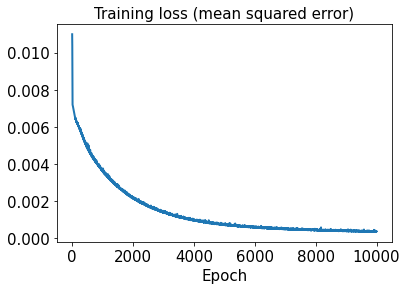

In [27]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

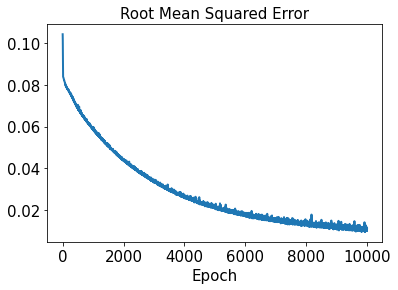

In [28]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [29]:
test_results = sd.evaluate(x_train)

13/13 [==============================] - 0s 1ms/step - loss: 2.2994e-04 - rmse: 0.0000e+00


In [30]:
decoded_train = sd.predict(x_train)

In [31]:
decoded_test = sd.predict(x_test)

In [32]:
error_train_abs = np.abs(decoded_train - y_train)

In [33]:
error_test_abs = np.abs(decoded_test - y_test)

In [34]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.011168079


In [35]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

1.5119585


In [36]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
#print(l2_error_train_list)

In [37]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
#print(l2_error_test_list)

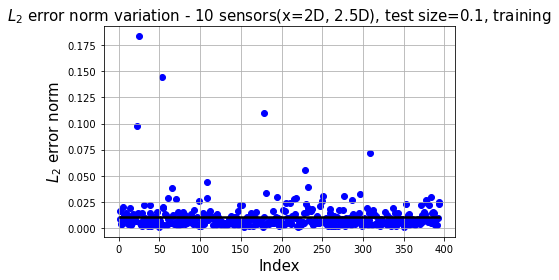

In [38]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 10 sensors(x=2D, 2.5D), test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

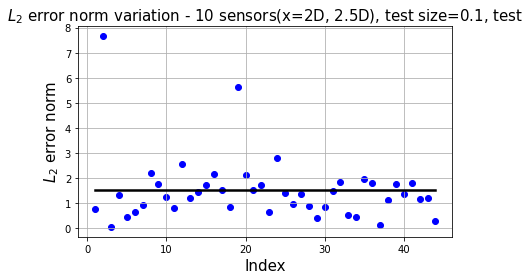

In [39]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - 10 sensors(x=2D, 2.5D), test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

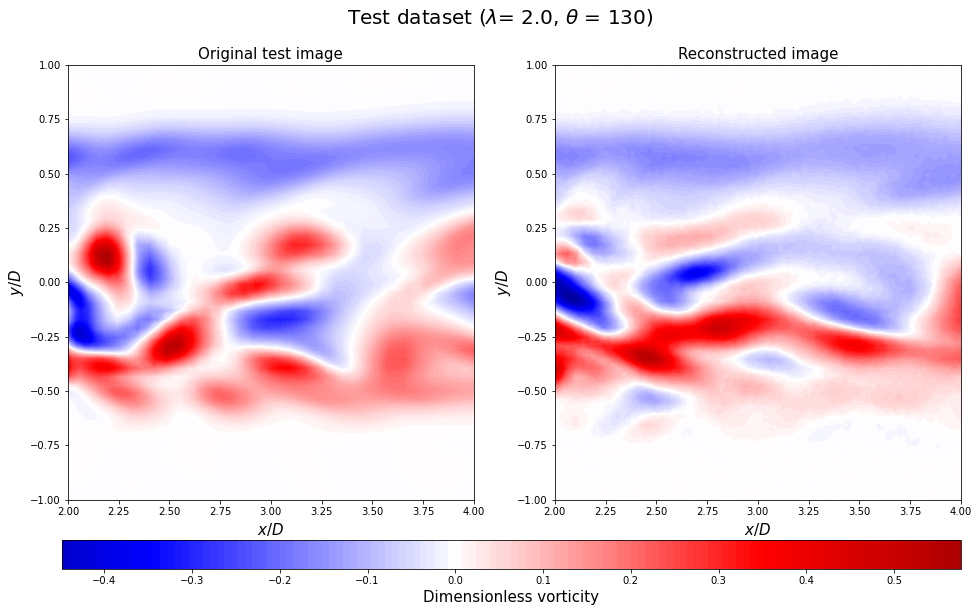

In [40]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

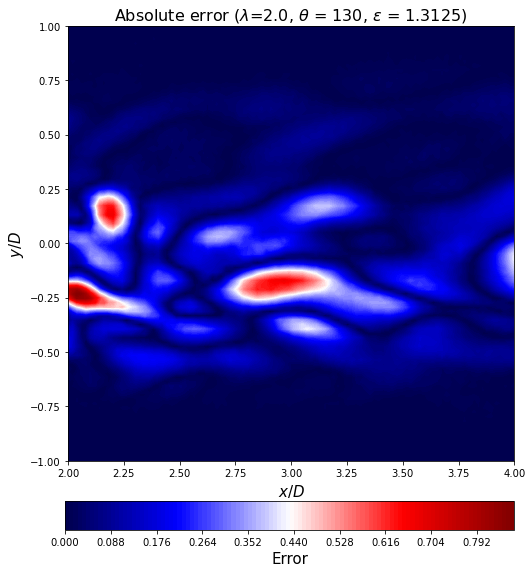

In [41]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()